In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Visualizing 6 decimals per value
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Reading data from csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

sensorama = load_dataset('sensorama_df.csv')

In [3]:
# Since odor name and canonical_smiles variables are strings, we change them to a numerical value
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['odor name'])
sensorama['odor name']=label_encoder.transform(sensorama['odor name'])
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(sensorama['canonical_smiles'])
sensorama['canonical_smiles']= label_encoder.transform(sensorama['canonical_smiles'])

In [4]:
# Normalizing function
def standarize(x_train):
    mean = x_train.mean()
    std = x_train.std()
    x_train -= mean
    x_train /= std

# Normalizing data
s= sensorama.columns
s=s.drop(['odor level', 'cid', 'canonical_smiles', 'odor name'])
for c in s:
    standarize(sensorama[c])
# After normalizing the data, we have NaNs values, so we change them to 0
sensorama=sensorama.fillna(0)

In [5]:
# Features
X=sensorama[['xlogp','fsp3', 'small rings','arom rings','ring blocks','arom blocks','rings 3','rings 4', 'rings 5', 'rings 6',
               'rings 7', 'rings 8', 'rings 9', 'tpsa efficiency', 'zagreb indices', 'weiner path', 'weiner polarity', 'wtpt.1',
               'wtpt.2', 'wtpt.3', 'wtpt.4', 'wtpt.5', 'molecular weight', 'VAdjMat', 'topoPSA', 'lipinski failures', 'rotatable bonds',
               'topo shape', 'petitjean number', 'mdec.11', 'mdec.12', 'mdec.13', 'mdec.14', 'mdec.22', 'mdec.23', 'mdec.24',
               'mdec.33', 'mdec.34', 'mdec.44', 'mdeo.11', 'mdeo.12', 'mdeo.22', 'mden.11', 'mden.12', 'mden.13', 'mden.22',
               'mden.23', 'mden.33', 'mlogp', 'atom p', 'atom lc', 'khs.sli', 'khs.ssbe', 'khs.ssssbe', 'khs.ssbh', 'khs.sssb',
               'khs.ssssb', 'khs.sch3', 'khs.dch2', 'khs.ssch2', 'khs.tch', 'khs.dsch', 'khs.aach', 'khs.sssch', 'khs.ddc',
               'khs.tsc', 'khs.dssc', 'khs.aasc', 'khs.aaac', 'khs.ssssc', 'khs.snh3', 'khs.snh2', 'khs.ssnh', 'khs.dnh', 'khs.ssnh.1',
               'khs.aanh', 'khs.tn', 'khs.sssnh', 'khs.dsn', 'khs.aan', 'khs.sssn', 'khs.dsn.1', 'khs.aasn', 'khs.ssssn', 'khs.soh',
               'khs.do', 'khs.sso', 'khs.aao', 'khs.sf', 'khs.ssih3', 'khs.sssih2', 'khs.ssssih', 'khs.sssssi', 'khs.sph2',
               'khs.ssph', 'khs.sssp', 'khs.dsssp', 'khs.sssssp', 'khs.ssh', 'khs.ds', 'khs.sss', 'khs.aas', 'khs.dsss', 'khs.ddsss',
               'khs.scl', 'khs.sGeH3', 'khs.ssGeH2', 'khs.sssGeH', 'khs.ssssGe', 'khs.sash2', 'khs.ssash', 'khs.sssas', 'khs.sssdas',
               'khs.sssssas', 'khs.sseh', 'khs.dse', 'khs.ssse', 'khs.aase', 'khs.dssse', 'khs.ddssse', 'khs.sbr', 'khs.ssnh3', 
               'khs.sssnh2', 'khs.ssssnh', 'khs.sssssn', 'khs.si', 'khs.spbh3', 'khs.sspbh2', 'khs.ssspbh', 'khs.sssspb', 'kier 1',
               'kier 2', 'hybRatio', 'hbdon', 'hbacc', 'fragc', 'fmf', 'eccen', 'SP.0', 'SP.1', 'SP.2', 'SP.3', 'SP.4', 'SP.5', 'SP.6',
               'SP.7', 'VP.0', 'VP.1', 'VP.2', 'VP.3', 'VP.4', 'VP.5', 'VP.6', 'VP.7', 'SPC.4', 'SPC.5', 'SPC.6', 'VPC.4', 'VPC.5',
               'VPC.6', 'SC.3', 'SC.4', 'SC.5', 'SC.6', 'VC.3', 'VC.4', 'VC.5', 'VC.6', 'SCH.3', 'SCH.4', 'SCH.5', 'SCH.6', 'SCH.7',
               'VCH.3', 'VCH.4', 'VCH.3', 'VCH.4', 'VCH.5', 'VCH.6', 'VCH.7', 'C1SP1', 'C2SP1', 'C1SP2', 'C2SP2', 'C3SP2', 'C1SP3',
               'C2SP3', 'C3SP3', 'C4SP3', 'bpol', 'bond count', 'basic group count', 'atsp1', 'atsp2' , 'atsp3', 'atsp4', 'atsp5',
               'atsm1', 'atsm2','atsm3','atsm4','atsm5', 'natom','arom bond', 'arom atom', 'apol','alogp', 'alogp2', 'amr', 'acid']]

### ODOR LEVEL 1

In [21]:
y = sensorama['odor level'] == 1

In [22]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

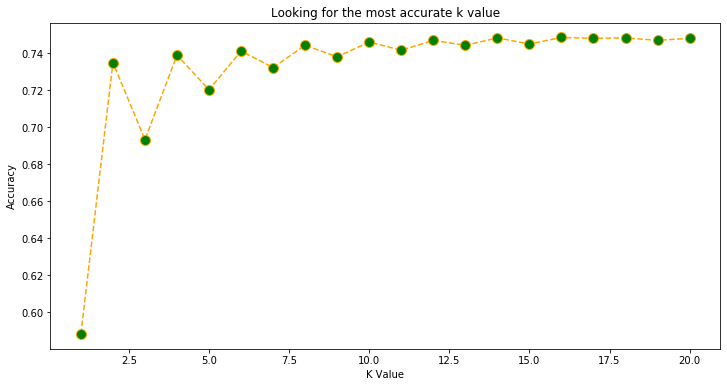

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [25]:
clf = KNeighborsClassifier(n_neighbors=16)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [26]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 74.83885307846188 %


### ODOR LEVEL 2

In [27]:
y = sensorama['odor level'] == 2

In [28]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

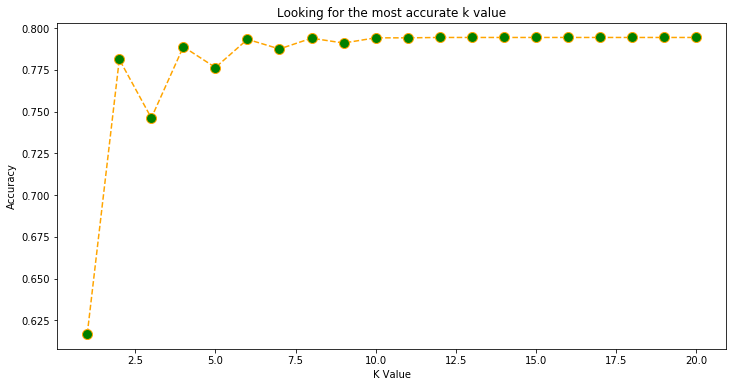

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [33]:
clf = KNeighborsClassifier(n_neighbors=14)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [34]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 79.43987552789508 %


### ODOR LEVEL 3

In [88]:
y = sensorama['odor level'] == 3

In [89]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

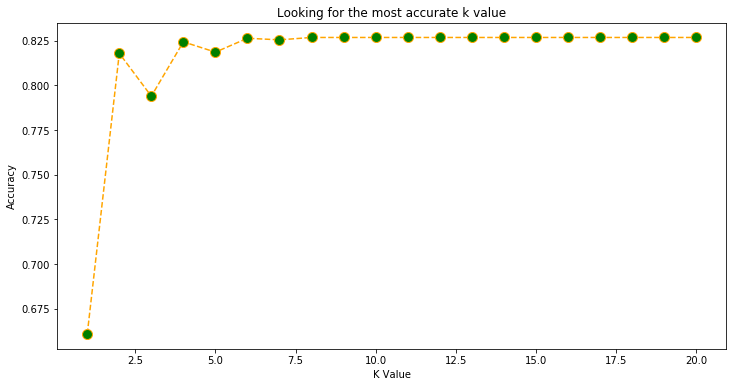

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [90]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [91]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 82.68504112024895 %


### ODOR LEVEL 4

In [84]:
y = sensorama['odor level'] == 4

In [85]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

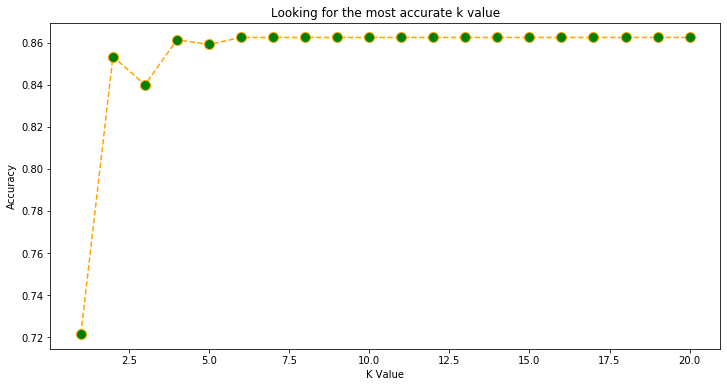

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [86]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [87]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 86.24138697488331 %


### ODOR LEVEL 5

In [80]:
y = sensorama['odor level'] == 5

In [81]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

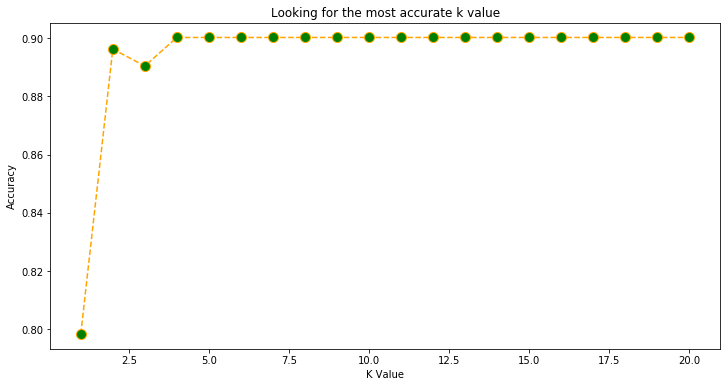

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [82]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [83]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 90.02000444543232 %


### ODOR LEVEL 6

In [76]:
y = sensorama['odor level'] == 6

In [77]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

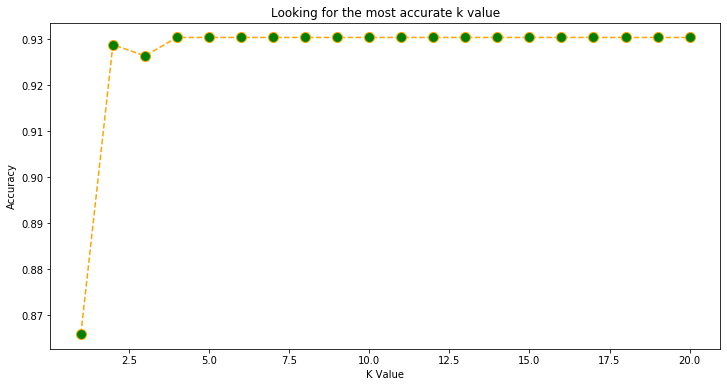

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [78]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [79]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 93.04289842187153 %


### ODOR LEVEL 7

In [72]:
y = sensorama['odor level'] == 7

In [73]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

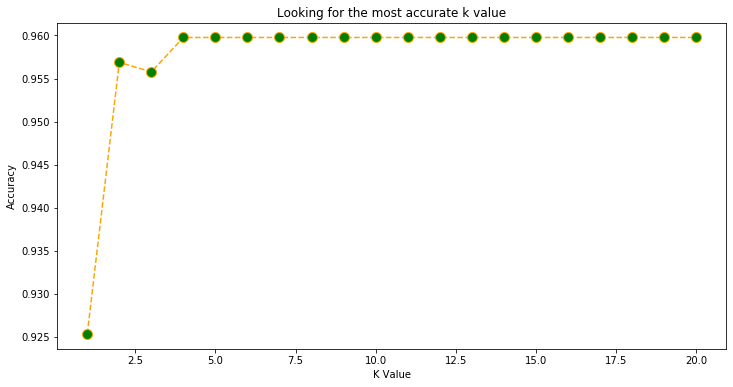

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [74]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [75]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 95.97688375194487 %


### ODOR LEVEL 8

In [66]:
y = sensorama['odor level'] == 8

In [67]:
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
accuracy=[]
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))

Text(0, 0.5, 'Accuracy')

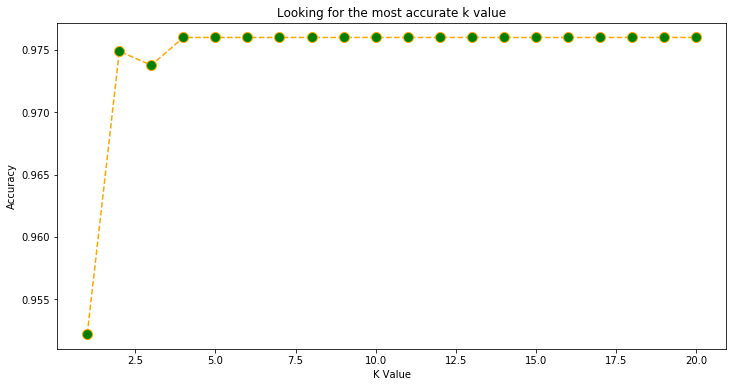

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Looking for the most accurate k value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [70]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [71]:
# Best accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100,"%")

Accuracy: 97.59946654812181 %
